<a id=section1></a>

## 1. Problem Statement

__Sales__ (in thousands of units) for a particular product as a __function__ of __advertising budgets__ (in thousands of dollars) for _TV, radio, and newspaper media_. Suppose that in our role as __Data Scientist__ we are asked to suggest.

- We want to find a function that given input budgets for TV, radio and newspaper __predicts the output sales__.

- Which media __contribute__ to sales?

- Visualize the __relationship__ between the _features_ and the _response_ using scatter plots.

<a id=section2></a>

## 2. Data Loading and Description

The adverstising dataset captures sales revenue generated with respect to advertisement spends across multiple channles like radio, tv and newspaper.
- TV        - Spend on TV Advertisements
- Radio     - Spend on radio Advertisements
- Newspaper - Spend on newspaper Advertisements
- Sales     - Sales revenue generated

__Importing Packages__

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn import metrics

import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#### Importing the Dataset

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/CaseStudy/Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
data.shape

(200, 4)

What are the **features**?
- TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper

What is the **response**?
- Sales: sales of a single product in a given market (in thousands of widgets)

<a id=section3></a>

## 3. Exploratory Data Analysis

In [4]:
data.shape

(200, 4)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [6]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


There are 200 **observations**, and thus 200 markets in the dataset.

__Distribution of Features__

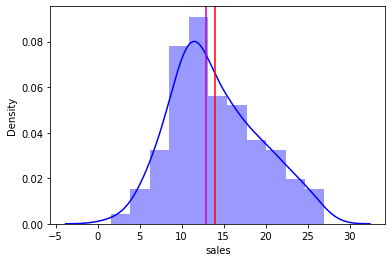

In [7]:
# Is my data normally distributed?
sns.distplot(data.sales, color='b')
plt.axvline(data.sales.mean(), color='r')
plt.axvline(data.sales.median(), color='m')
plt.show()

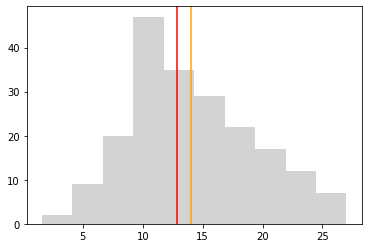

In [11]:
fig, ax = plt.subplots()
plt.axvline(data.sales.mean(), color='orange')
plt.axvline(data.sales.median(), color='red')
_ = plt.hist(data.sales, color = 'lightgray')

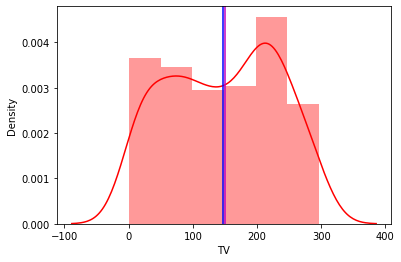

In [12]:
# Is my data normally distributed?
sns.distplot(data.TV, color='r')
plt.axvline(data.TV.mean(), color='b')
plt.axvline(data.TV.median(), color='m')
plt.show()

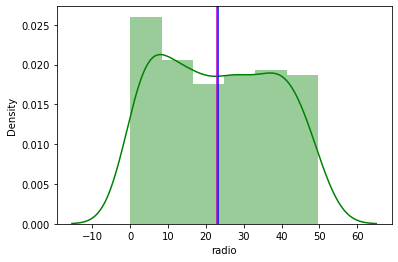

In [13]:
# Is my data normally distributed?
sns.distplot(data.radio, color='g')
plt.axvline(data.radio.mean(), color='b')
plt.axvline(data.radio.median(), color='m')
plt.show()

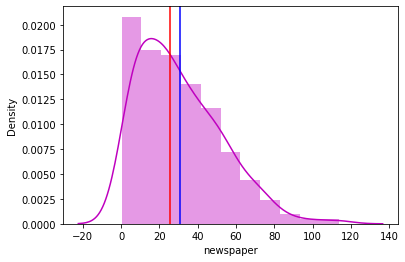

In [14]:
# Is my data normally distributed?
sns.distplot(data.newspaper, color='m')
plt.axvline(data.newspaper.mean(), color='b')
plt.axvline(data.newspaper.median(), color='r')
plt.show()

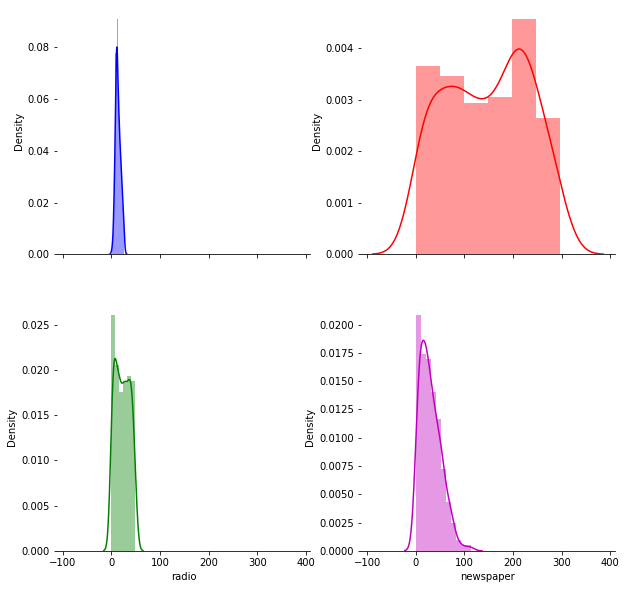

In [15]:
f, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True)                                      # Set up the matplotlib figure
sns.despine(left=True)

sns.distplot(data.sales, color="b", ax=axes[0, 0])

sns.distplot(data.TV, color="r", ax=axes[0, 1])

sns.distplot(data.radio, color="g", ax=axes[1, 0])

sns.distplot(data.newspaper, color="m", ax=axes[1, 1]);

__Observations__<br/>
_Sales_ seems to be __normal distribution__. Spending on _newspaper advertisement_ seems to be __right skewed__. Most of the spends on _newspaper_ is __fairly low__ where are spend on _radio and tv_ seems be __uniform distribution__. Spends on _tv_ are __comparatively higher__ then spend on _radio and newspaper_.

In [16]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### Is there a relationship between sales and spend various advertising channels?

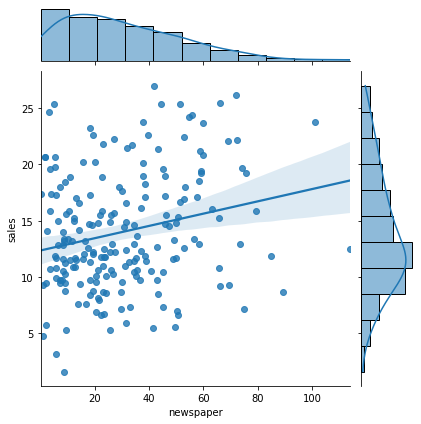

In [17]:
sns.jointplot("newspaper", "sales", data=data, kind='reg');

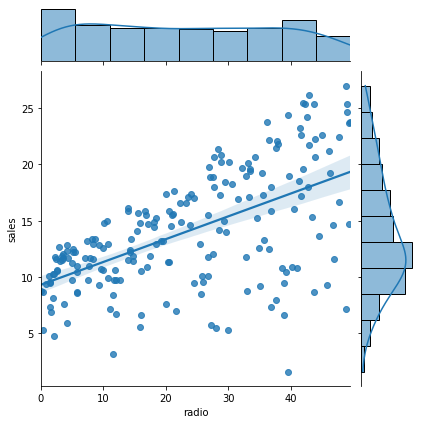

In [18]:
sns.jointplot("radio", "sales", data=data, kind='reg');

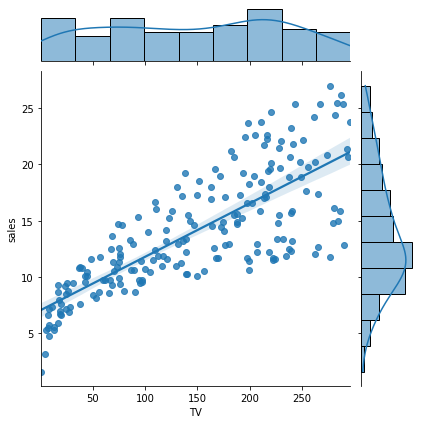

In [19]:
sns.jointplot("TV", "sales", data=data, kind='reg');

AttributeError: 'Figure' object has no attribute '_make_key'

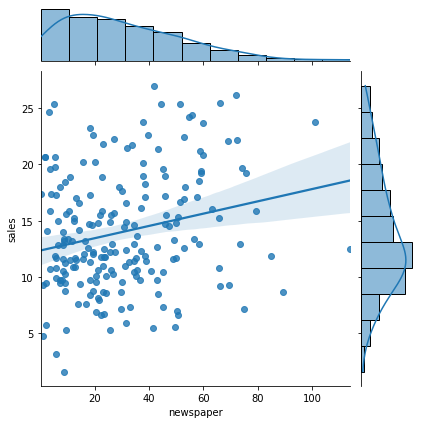

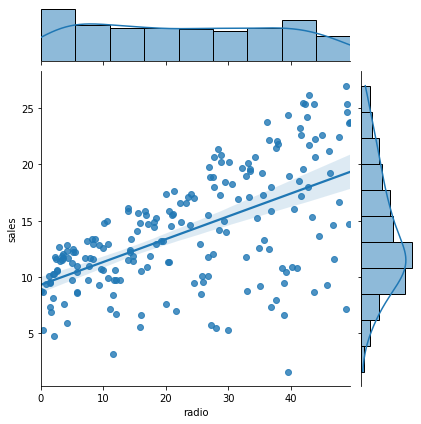

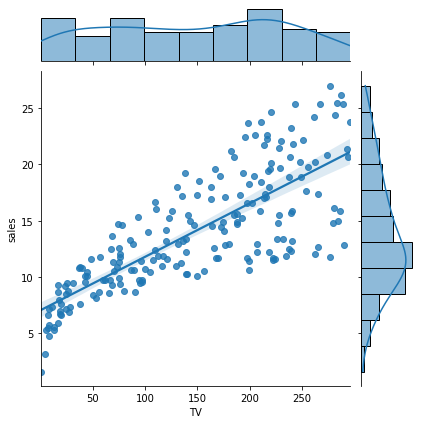

<Figure size 432x288 with 0 Axes>

In [20]:
JG1 = sns.jointplot("newspaper", "sales", data=data, kind='reg')
JG2 = sns.jointplot("radio", "sales", data=data, kind='reg')
JG3 = sns.jointplot("TV", "sales", data=data, kind='reg')

#subplots migration
f = plt.figure()
for J in [JG1, JG2,JG3]:
    for A in J.fig.axes:
        f._axstack.add(f._make_key(A), A);

__Observation__<br/>
_Sales and spend on newpaper_ is __not__ highly correlated where are _sales and spend on tv_ is __highly correlated__.

In [21]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### Visualising Pairwise correlation

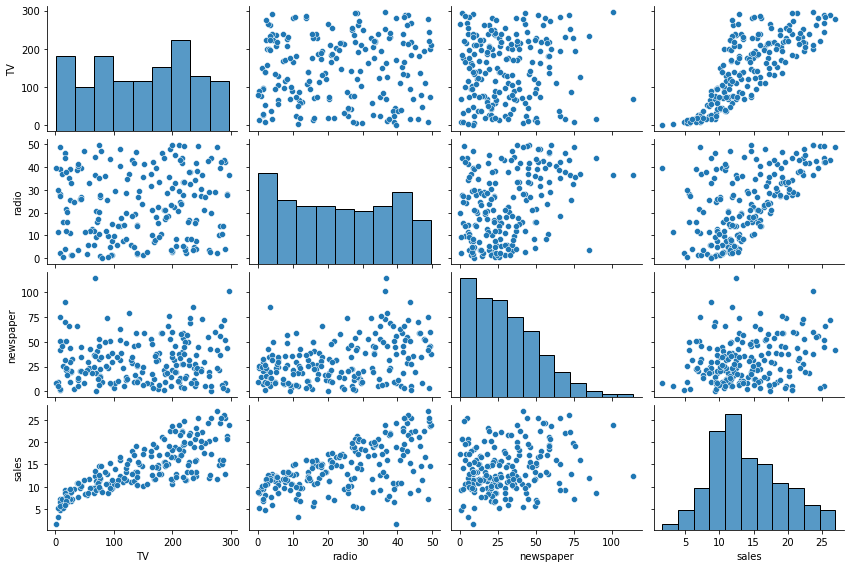

In [22]:
sns.pairplot(data, size = 2, aspect = 1.5)

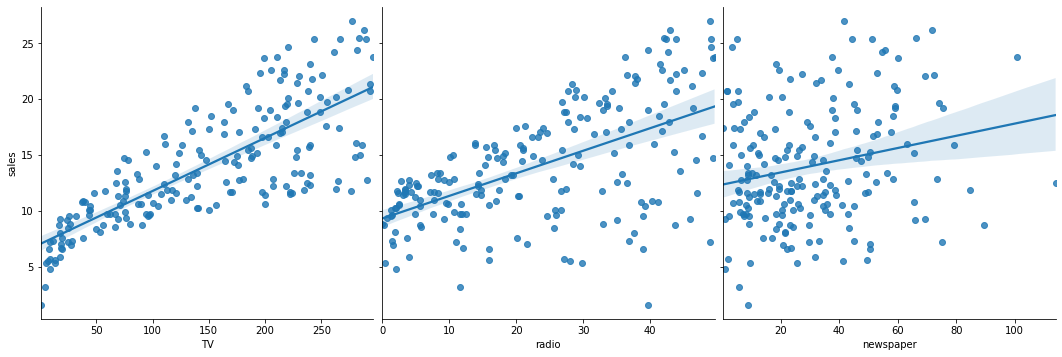

In [23]:
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', height=5, aspect=1, kind='reg');

__Observation__

- Strong relationship between TV ads and sales
- Weak relationship between Radio ads and sales
- Very weak to no relationship between Newspaper ads and sales



### Calculating and plotting heatmap correlation

In [26]:
x = data.corr();
x

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


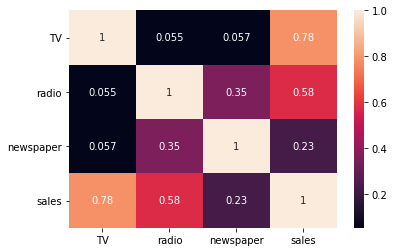

In [27]:
sns.heatmap(x, annot=True);

__Observation__

- The diagonal of the above matirx shows the auto-correlation of the variables. It is always 1. You can observe that the correlation between __TV and Sales is highest i.e. 0.78__ and then between __sales and radio i.e. 0.576__.

- correlations can vary from -1 to +1. Closer to +1 means strong positive correlation and close -1 means strong negative correlation. Closer to 0 means not very strongly correlated. variables with __strong correlations__ are mostly probably candidates for __model builing__.


<a id=section4></a>

## 4. Introduction to Linear Regression

__Linear regression__ is a _basic_ and _commonly_ used type of __predictive analysis__.  The overall idea of regression is to examine two things: 
- Does a set of __predictor variables__ do a good job in predicting an __outcome__ (dependent) variable?  
- Which variables in particular are __significant predictors__ of the outcome variable, and in what way they do __impact__ the outcome variable?  

These regression estimates are used to explain the __relationship between one dependent variable and one or more independent variables__.  The simplest form of the regression equation with one dependent and one independent variable is defined by the formula :<br/>
$y = \beta_0 + \beta_1x$

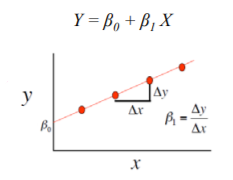

What does each term represent?
- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x


Three major uses for __regression analysis__ are: 
- determining the __strength__ of predictors,
    - Typical questions are what is the strength of __relationship__ between _dose and effect_, _sales and marketing spending_, or _age and income_.
- __forecasting__ an effect, and
    - how much __additional sales income__ do I get for each additional $1000 spent on marketing?
- __trend__ forecasting.
    - what will the __price of house__ be in _6 months_?

<a id=section401></a>

### 4.1 Linear Regression Equation with Errors in consideration

While taking errors into consideration the equation of linear regression is: 
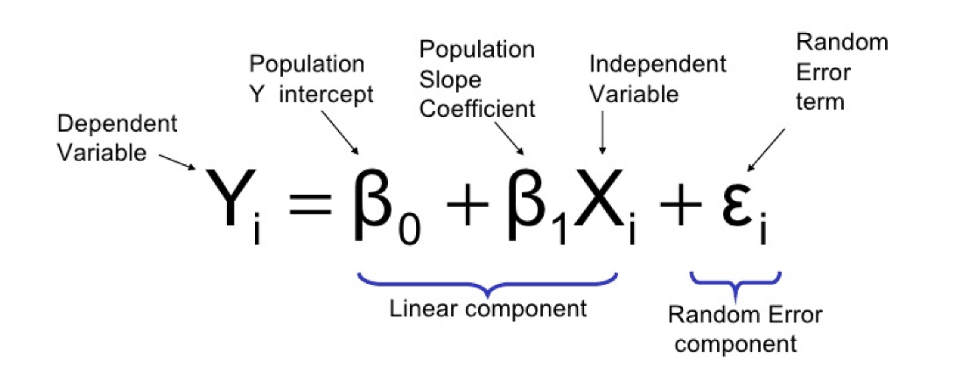
Generally speaking, coefficients are estimated using the **least squares criterion**, which means we are find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors"):


What elements are present in the diagram?
- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the distances between the observed values and the least squares line.
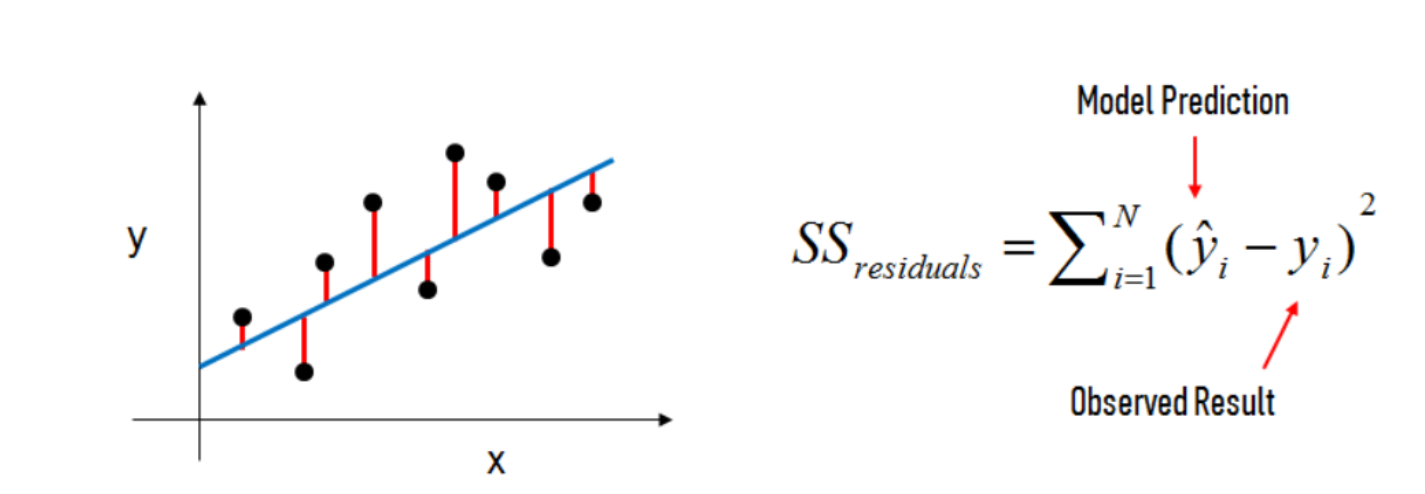


How do the model coefficients relate to the least squares line?
- $\beta_0$ is the **intercept** (the value of $y$ when $x$ = 0)
- $\beta_1$ is the **slope** (the change in $y$ divided by change in $x$)

Here is a graphical depiction of those calculations:
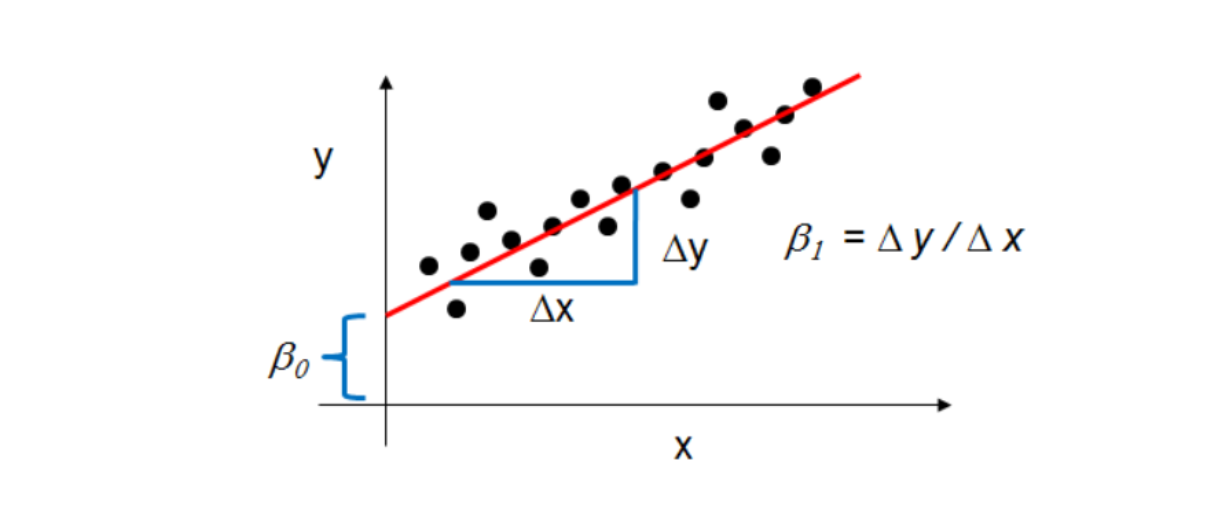

<a id = sectionassumptions></a>

#### 4.1.1 Assumptions of Linear Regression

1. There should be a linear and additive relationship between dependent (response) variable and independent (predictor) variable(s). A linear relationship suggests that a change in response Y due to one unit change in X¹ is constant, regardless of the value of X¹. An additive relationship suggests that the effect of X¹ on Y is independent of other variables.
2. There should be no correlation between the residual (error) terms. Absence of this phenomenon is known as Autocorrelation.
3. The independent variables should not be correlated. Absence of this phenomenon is known as multicollinearity.
4. The error terms must have constant variance. This phenomenon is known as homoskedasticity. The presence of non-constant variance is referred to heteroskedasticity.
5. The error terms must be normally distributed.

In [28]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [29]:
data.shape

(200, 4)

In [30]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [31]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

<a id=section402></a>

### 4.2 Preparing X and y using pandas

In [32]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [33]:
data[ ['TV', 'radio', 'newspaper'] ]

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4
...,...,...,...
196,38.2,3.7,13.8
197,94.2,4.9,8.1
198,177.0,9.3,6.4
199,283.6,42.0,66.2


In [34]:
feature_cols = ['TV', 'radio', 'newspaper']                # create a Python list of feature names
X = data[feature_cols]                                     # use the list to select a subset of the original DataFrame-+
# OR
# X = data[ ['TV', 'radio', 'newspaper'] ]

In [35]:
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [30]:
X.columns

Index(['TV', 'radio', 'newspaper'], dtype='object')

- Checking the type and shape of X.

In [36]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [37]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [38]:
y = data.sales
# OR
# y = data['sales']
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [39]:
y.shape

(200,)

- Check the type and shape of y

In [40]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


In [41]:
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [42]:
data.head(10)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


In [43]:
data.tail(10)

,TV,radio,newspaper,sales
191,39.5,41.1,5.8,10.8
192,75.5,10.8,6.0,9.9
193,17.2,4.1,31.6,5.9
194,166.8,42.0,3.6,19.6
195,149.7,35.6,6.0,17.3
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


<a id=section403></a>

### 4.3 Splitting X and y into training and test datasets.

In [44]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# default test_size=0.25
# random_state=seedvalue

In [45]:
X_train.head() # 0 to 159

,TV,radio,newspaper
135,36.9,38.6,65.6
67,31.5,24.6,2.2
27,142.9,29.3,12.6
114,209.6,20.6,10.7
169,215.4,23.6,57.6


In [46]:
y_train

135    10.8
67      9.5
27     15.0
114    15.9
169    17.1
       ... 
68     13.4
193     5.9
118     9.4
48     23.2
173     7.6
Name: sales, Length: 160, dtype: float64

In [47]:
X_train.tail() # 155 to 159

,TV,radio,newspaper
68,139.3,14.5,10.2
193,17.2,4.1,31.6
118,76.4,0.8,14.8
48,239.9,41.5,18.5
173,19.6,20.1,17.0


In [48]:
X_test.head() # 160 to 164

,TV,radio,newspaper
19,69.2,20.5,18.3
171,50.0,11.6,18.4
108,90.4,0.3,23.2
99,289.7,42.3,51.2
178,170.2,7.8,35.2


In [49]:
print('Train cases as below')
print('X_train shape: ',X_train.shape) # (160,3)
print('y_train shape: ',y_train.shape) # (160,)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape) # (40,3)
print('y_test shape: ',y_test.shape) # (40,)

Train cases as below
X_train shape:  (160, 3)
y_train shape:  (160,)

Test cases as below
X_test shape:  (40, 3)
y_test shape:  (40,)


In [50]:
import random as rd
l = [1,2,3,4,5]
print(rd.choice(l))
# rd.choice() chooses different random numbers from the list everytime

2


In [51]:
for i in range(100):
    print(rd.choice([1,2,3,4,5]), end=" || ")

5 || 5 || 2 || 4 || 4 || 3 || 4 || 5 || 4 || 4 || 4 || 1 || 5 || 4 || 4 || 4 || 2 || 2 || 4 || 5 || 5 || 5 || 2 || 5 || 3 || 2 || 5 || 5 || 2 || 2 || 2 || 2 || 2 || 2 || 1 || 3 || 3 || 1 || 4 || 3 || 3 || 4 || 2 || 5 || 2 || 4 || 5 || 1 || 5 || 2 || 2 || 2 || 3 || 3 || 5 || 5 || 2 || 4 || 4 || 5 || 1 || 4 || 5 || 2 || 3 || 4 || 5 || 3 || 5 || 2 || 2 || 3 || 1 || 2 || 2 || 3 || 3 || 4 || 2 || 5 || 2 || 5 || 4 || 5 || 1 || 5 || 2 || 1 || 3 || 5 || 1 || 5 || 1 || 4 || 2 || 4 || 1 || 4 || 2 || 1 || 

In [52]:
import random as rd
rd.seed(0)
print(rd.random())

0.8444218515250481


In [53]:
import random as rd
rd.seed(0)
l = [1,2,3,4,5]
# rd.choice() chooses different random numbers from the list everytime
print(rd.choice(l))

4


In [54]:
rd.seed(0)
for i in range(100):
    print(rd.choice([1,2,3,4,5]), end=" || ")

4 || 4 || 1 || 3 || 5 || 4 || 4 || 3 || 4 || 3 || 5 || 2 || 5 || 2 || 3 || 2 || 1 || 5 || 3 || 5 || 5 || 2 || 3 || 1 || 1 || 3 || 4 || 5 || 1 || 3 || 4 || 3 || 5 || 2 || 5 || 4 || 4 || 5 || 3 || 1 || 5 || 1 || 1 || 4 || 1 || 5 || 4 || 3 || 2 || 3 || 1 || 2 || 5 || 2 || 2 || 2 || 5 || 4 || 1 || 1 || 3 || 5 || 4 || 1 || 3 || 5 || 3 || 1 || 5 || 3 || 5 || 2 || 5 || 5 || 5 || 3 || 4 || 1 || 5 || 4 || 3 || 5 || 2 || 3 || 2 || 2 || 2 || 1 || 5 || 3 || 4 || 1 || 1 || 2 || 2 || 1 || 1 || 5 || 4 || 5 || 

In [55]:
X_train.shape

(160, 3)

In [56]:
X_test.shape

(40, 3)

In [57]:
y_train.shape

(160,)

In [58]:
y_test.shape

(40,)

In [59]:
X_train.describe()

,TV,radio,newspaper
count,160.000000,160.000000,160.000000
mean,150.518125,23.388125,30.125625
std,84.957371,14.736240,21.444814
min,4.100000,0.000000,0.900000
25%,76.375000,9.525000,11.675000
50%,157.400000,24.300000,25.900000
75%,220.350000,36.350000,45.100000
max,296.400000,49.600000,100.900000


In [60]:
X_test.describe()

,TV,radio,newspaper
count,40.000000,40.000000,40.000000
mean,133.140000,22.767500,32.267500
std,89.088262,15.462832,23.270774
min,0.700000,0.300000,0.300000
25%,58.750000,10.950000,15.250000
50%,127.400000,20.250000,24.650000
75%,200.425000,36.950000,43.900000
max,289.700000,49.400000,114.000000


- __Standardization__. <br/>
Standardize features by removing the _mean_ and scaling to _unit standard deviation_.

In [67]:
# Read about MinMaxScaler, RobustScaler
# import Standard Scaler package. It will scaler the data around 0
from sklearn.preprocessing import StandardScaler

# Create object of StandardScaler()
scaler = StandardScaler()

# Now go and study i.e. fit() and give exam i.e. transform() on X_train
X_train[ ['TV', 'radio', 'newspaper'] ] = scaler.fit_transform(X_train)

# Now the entire intelligence to scale the data is stored in the variable 'scaler' i.e.
# study is already done and now we can keep on using transform() as many times as we want

X_test[ ['TV', 'radio', 'newspaper'] ] = scaler.transform(X_test)

In [68]:
X_train.head()

,TV,radio,newspaper
135,-1.341553,1.035518,1.659411
67,-1.405314,0.082496,-1.306297
27,-0.089952,0.402439,-0.819809
114,0.697613,-0.189796,-0.908687
169,0.766097,0.014423,1.285189


In [69]:
X_train.describe()

,TV,radio,newspaper
count,1.600000e+02,1.600000e+02,1.600000e+02
mean,2.498002e-17,-1.670539e-16,-1.047773e-16
std,1.003140e+00,1.003140e+00,1.003140e+00
min,-1.728842e+00,-1.592099e+00,-1.367108e+00
25%,-8.754498e-01,-9.437042e-01,-8.630784e-01
50%,8.125819e-02,6.207404e-02,-1.976652e-01
75%,8.245444e-01,8.823534e-01,7.004673e-01
max,1.722510e+00,1.784320e+00,3.310665e+00


In [70]:
X_test.head()

,TV,radio,newspaper
19,-0.960169,-0.196603,-0.553176
171,-1.186874,-0.802453,-0.548498
108,-0.709849,-1.571677,-0.323965
99,1.643399,1.287388,0.985811
178,0.232395,-1.061130,0.237368


In [71]:
y_train.head()

135    10.8
67      9.5
27     15.0
114    15.9
169    17.1
Name: sales, dtype: float64

In [72]:
y_test.head()

19     11.3
171     8.4
108     8.7
99     25.4
178    11.7
Name: sales, dtype: float64

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

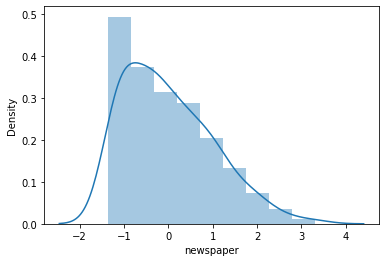

In [73]:
sns.distplot(X_train['newspaper'])

<a id=section404></a>

### 4.4 Linear regression in scikit-learn

To apply any machine learning algorithm on your dataset, basically there are 4 steps:
1. Load the algorithm
2. Instantiate and Fit the model to the training dataset
3. Prediction on the test set
4. Calculating Root mean square error 
The code block given below shows how these steps are carried out:<br/>

``` from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    linreg.fit(X_train, y_train) 
    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))```

In [74]:
# Train the Algorithm

# import the module
from sklearn.linear_model import LinearRegression

# Create an object of LinearRegression()
regressor = LinearRegression()

# Study on (QB, AB) i.e. fit()
regressor.fit(X_train, y_train)

LinearRegression()

<a id=section405></a>

### 4.5 Interpreting Model Coefficients

In [75]:
regressor.intercept_ # beta0 or y-intercept

14.217500000000001

In [76]:
regressor.coef_ # beta1, beta2, beta3 i.e Slope/Coefficient

array([ 3.77588591,  2.88656448, -0.05946128])

In [77]:
feature_cols

['TV', 'radio', 'newspaper']

In [78]:
feature_cols.insert(0,'Intercept')
feature_cols

['Intercept', 'TV', 'radio', 'newspaper']

In [79]:
coef = regressor.coef_.tolist()
coef

[3.7758859111498797, 2.8865644821599865, -0.05946128458314748]

In [80]:
coef.insert(0, regressor.intercept_)
coef

[14.217500000000001,
 3.7758859111498797,
 2.8865644821599865,
 -0.05946128458314748]

Its hard to remember the order of the feature names, we so we are __zipping__ the features to pair the feature names with the coefficients

In [81]:
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept 14.217500000000001
TV 3.7758859111498797
radio 2.8865644821599865
newspaper -0.05946128458314748


__y = 14.217500000000001 + 3.7758859111498797 `*` TV + 2.8865644821599865 `*` radio + -0.05946128458314748 `*` newspaper__

How do we interpret the TV coefficient (_3.7758859111498797_)
- A "unit" increase in TV ad spending is **associated with** a _"3.7758859111498797_ unit" increase in Sales.
- Or more clearly: An additional $1,000 spent on TV ads is **associated with** an increase in sales of 770.8 widgets.

Important Notes:
- This is a statement of __association__, not __causation__.
- If an increase in TV ad spending was associated with a __decrease__ in sales,  β1  would be __negative.__

<a id=section406></a>

### 4.6 Using the Model for Prediction

In [82]:
y_pred_train = regressor.predict(X_train)

In [83]:
y_pred_test = regressor.predict(X_test)

- We need an evaluation metric in order to compare our predictions with the actual values.

In [84]:
y_pred_train

array([12.04236485,  9.22699748, 15.08826616, 16.35778089, 17.07540865,
       13.36661981,  3.78817791, 12.08662048, 15.62955297,  8.68273227,
       10.61195362, 19.36739522, 18.41226024, 15.30372386, 10.00012405,
        8.19743932, 21.49425935, 14.15684188, 16.3171467 ,  8.72677043,
       15.26881361, 12.47602439, 13.7213733 , 14.20527235, 18.32820674,
       19.11937848, 20.32200442, 17.49488834,  9.34748691, 11.75581878,
       19.85996966,  9.91949478, 20.71025022, 23.06178922, 10.08383292,
       17.13980942, 19.65212394, 18.43129662, 16.91732121, 18.37653406,
       17.10374151,  8.84010201,  9.94425907,  5.38665742,  3.58633703,
       16.63361911, 12.58819659, 18.15954096, 11.77376066, 12.69588564,
       13.79647123,  7.01426813, 16.64772647,  9.79703851,  8.13501333,
       15.71731388, 24.83264798, 10.84564094, 21.15206558, 13.84768418,
       10.64154445,  8.46646573, 12.4156824 , 20.48878664, 10.50385731,
       14.51608774, 16.33763035, 17.16954682, 13.18269257, 17.34

In [85]:
X_test.shape

(40, 3)

In [86]:
y_pred_test

array([10.05739563,  7.4522807 ,  7.0197076 , 24.08029725, 12.01786259,
        6.53793858, 12.78286918, 15.10974587, 10.76974013, 16.34357951,
       22.88297477,  9.12924467, 10.46455672, 15.48743552, 11.58555633,
       12.17296914, 18.76551502, 10.78318566, 15.90515992, 17.30651279,
       24.06692057,  9.59834224, 15.13512211, 12.38591525,  5.71360885,
       15.24749314, 12.29402334, 20.9421167 , 13.40991558,  9.04348832,
       12.89239415, 21.40272028, 18.13802209, 21.17320803,  6.56974433,
        6.14114206,  7.89018394, 13.01541434, 14.68953791,  6.18835143])

In [87]:
X_test.head()

,TV,radio,newspaper
19,-0.960169,-0.196603,-0.553176
171,-1.186874,-0.802453,-0.548498
108,-0.709849,-1.571677,-0.323965
99,1.643399,1.287388,0.985811
178,0.232395,-1.061130,0.237368


In [88]:
y = 14.217500000000001 + (3.7758859111498797 * -0.960169) + (2.8865644821599865 * -0.196603) + (-0.05946128458314748 * -0.553176)
y

10.0573967192516

<a id=section5></a>

## 5. Model evaluation 

__Error__ is the _deviation_ of the values _predicted_ by the model with the _true_ values.<br/>
For example, if a model predicts that the price of apple is Rs75/kg, but the actual price of apple is Rs100/kg, then the error in prediction will be Rs25/kg.<br/>
Below are the types of error we will be calculating for our _linear regression model_:
- Mean Absolute Error
- Mean Squared Error
- Root Mean Squared Error

<a id=section501></a>

### 5.1 Model Evaluation using __metrics.__

__Mean Absolute Error__ (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
Computing the MAE for our Sales predictions

In [89]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [90]:
MAE_train = mean_absolute_error(y_train, y_pred_train)
MAE_test = mean_absolute_error(y_test, y_pred_test)

In [91]:
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 1.2131871622729427
MAE for test set is 1.361781350209028


__Mean Squared Error__ (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

Computing the MSE for our Sales predictions

In [92]:
MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)

In [93]:
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 2.406814755818906
MSE for test set is 4.402118291449685


__Root Mean Squared Error__ (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Computing the RMSE for our Sales predictions

In [94]:
RMSE_train = np.sqrt( mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

In [95]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 1.5513912323520802
RMSE for test set is 2.0981225634956804


Comparing these metrics:

- __MAE__ is the easiest to understand, because it's the __average error.__ 
- __MSE__ is more popular than MAE, because MSE "punishes" larger errors.
- __RMSE__ is even more popular than MSE, because RMSE is _interpretable_ in the "y" units.
    - Easier to put in context as it's the same units as our response variable.

In [96]:
from sklearn.metrics import mean_absolute_percentage_error

In [97]:
MAPE_train = ( mean_absolute_percentage_error(y_train, y_pred_train))
MAPE_test = (mean_absolute_percentage_error(y_test, y_pred_test))

In [98]:
print('MAPE for training set is {}'.format(MAPE_train))
print('MAPE for test set is {}'.format(MAPE_test))

MAPE for training set is 0.11431218152123195
MAPE for test set is 0.24610850610005613


<a id=section502></a>

### 5.2 Model Evaluation using Rsquared value.

- There is one more method to evaluate linear regression model and that is by using the __Rsquared__ value.<br/>
- R-squared is the **proportion of variance explained**, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the **null model**. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)

- R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model. But there is one shortcoming of Rsquare method and that is **R-squared will always increase as you add more features to the model**, even if they are unrelated to the response. Thus, selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

There is alternative to R-squared called **adjusted R-squared** that penalizes model complexity (to control for overfitting).

In [ ]:
from sklearn.metrics import r2_score
r2_score_train = r2_score(y_train, y_pred_train)
r2_score_test = r2_score(y_test, y_pred_test)

In [ ]:
r2_score_train

In [ ]:
r2_score_test

In [ ]:
n = X_train.shape[0]
n

In [ ]:
k = len(list(X_train.columns))
k

# OR
# k = X_train.shape[1]
# k

In [ ]:
NUM = (1-r2_score_train) * (n-1)
NUM

In [ ]:
DEN = n-k-1
DEN

In [ ]:
adj_r2_score_train = 1 - (NUM/DEN)
adj_r2_score_train

In [ ]:
n = X_test.shape[0]
n

In [ ]:
NUM = (1-r2_score_test) * (n-1)
NUM

In [ ]:
DEN = n-k-1
DEN

In [ ]:
adj_r2_score_test = 1 - (NUM/DEN)
adj_r2_score_test

In [ ]:
yhat = regressor.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

In [ ]:
yhat = regressor.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

<a id=section6></a>

<a id=section7></a>

In [ ]:
X_train.head()

In [ ]:
X_train.drop('newspaper', axis=1, inplace=True)
X_train.head()

In [ ]:
X_test.head()

In [ ]:
X_test.drop('newspaper', axis=1, inplace=True)
X_test.head()

In [ ]:
# Linear Regression

# Train the Algorithm
from sklearn.linear_model import LinearRegression
regressor1 = LinearRegression()
regressor1.fit(X_train, y_train)

### 4.5 Interpreting Model Coefficients

In [ ]:
regressor1.intercept_

In [ ]:
regressor1.coef_

In [ ]:
feature_cols = feature_cols[0:-1]
feature_cols

In [ ]:
coef1 = regressor1.coef_.tolist()
coef1

In [ ]:
coef1.insert(0, regressor1.intercept_)
coef1

Its hard to remember the order of the feature names, we so we are __zipping__ the features to pair the feature names with the coefficients

In [ ]:
eq1 = zip(feature_cols, coef1)

for c1,c2 in eq1:
    print(c1,c2)

<a id=section406></a>

### 4.6 Using the Model for Prediction

In [ ]:
y_pred_train1 = regressor1.predict(X_train)

In [ ]:
y_pred_test1 = regressor1.predict(X_test)

- We need an evaluation metric in order to compare our predictions with the actual values.

In [ ]:
y_pred_train1

In [ ]:
y_pred_test1

<a id=section5></a>

## 5. Model evaluation 

__Error__ is the _deviation_ of the values _predicted_ by the model with the _true_ values.<br/>
For example, if a model predicts that the price of apple is Rs75/kg, but the actual price of apple is Rs100/kg, then the error in prediction will be Rs25/kg.<br/>
Below are the types of error we will be calculating for our _linear regression model_:
- Mean Absolute Error
- Mean Squared Error
- Root Mean Squared Error

<a id=section501></a>

### 5.1 Model Evaluation using __metrics.__

__Mean Absolute Error__ (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
Computing the MAE for our Sales predictions

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
MAE_train1 = mean_absolute_error(y_train, y_pred_train1)
MAE_test1 = mean_absolute_error(y_test, y_pred_test1)

In [ ]:
print('MAE for training set is {}'.format(MAE_train1))
print('MAE for test set is {}'.format(MAE_test1))

__Mean Squared Error__ (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

Computing the MSE for our Sales predictions

In [ ]:
MSE_train1 = mean_squared_error(y_train, y_pred_train1)
MSE_test1 = mean_squared_error(y_test, y_pred_test1)

In [ ]:
print('MSE for training set is {}'.format(MSE_train1))
print('MSE for test set is {}'.format(MSE_test1))

__Root Mean Squared Error__ (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Computing the RMSE for our Sales predictions

In [ ]:
RMSE_train1 = np.sqrt( mean_squared_error(y_train, y_pred_train1))
RMSE_test1 = np.sqrt(mean_squared_error(y_test, y_pred_test1))

In [ ]:
print('RMSE for training set is {}'.format(RMSE_train1))
print('RMSE for test set is {}'.format(RMSE_test1))

<a id=section502></a>

### 5.2 Model Evaluation using Rsquared value.

- There is one more method to evaluate linear regression model and that is by using the __Rsquared__ value.<br/>
- R-squared is the **proportion of variance explained**, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the **null model**. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)

- R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model. But there is one shortcoming of Rsquare method and that is **R-squared will always increase as you add more features to the model**, even if they are unrelated to the response. Thus, selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

There is alternative to R-squared called **adjusted R-squared** that penalizes model complexity (to control for overfitting).

In [ ]:
from sklearn.metrics import r2_score
r2_score_train1 = r2_score(y_train, y_pred_train1)
r2_score_test1 = r2_score(y_test, y_pred_test1)

In [ ]:
r2_score_train1

In [ ]:
r2_score_test1

In [ ]:
yhat = regressor1.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

In [ ]:
yhat = regressor1.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

<a id=section6></a>

<a id=section7></a>